# Using XGBoost on Iris Data


http://xgboost.readthedocs.io/en/latest/python/python_intro.html


In [1]:
import numpy as np
import xgboost as xgb
import pandas as pd
import random
# import matplotlib 
# import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
dat = pd.read_csv("data/iris.csv")

In [3]:
dat = np.array(dat)

data = dat[:, 0:4]
label = dat[:, 4]

def label_encoder(x):
    if x == "setosa":
        return 0
    if x == "versicolor":
        return 1
    else:
        return 2
label = np.array(map(label_encoder, label))

train_index = random.sample(range(50), 35) + random.sample(range(51, 100+1), 35) + random.sample(range(101, 150), 35)

train_data = data[train_index]
train_label = label[train_index]

test_data = data[list(set(range(150)) - set(train_index))]
test_label = label[list(set(range(150)) - set(train_index))]

In [4]:
xgmat = xgb.DMatrix(train_data, label=train_label, missing = -999.0)
test_data = xgb.DMatrix(test_data, missing = -999.0)

## Configure the parameters

http://xgboost.readthedocs.io/en/latest///parameter.html#general-parameters

**eta**: learning rate

**objective**:

**eval_metric**:

In [5]:
param = {'max_depth':2, 
         'eta':0.1, 
         'silent':0,
         'objective':'multi:softmax',
         'num_class':3,
         'eval_metric':'error'}

num_round = 20
bst = xgb.train(param, xgmat, num_round)

preds = bst.predict(test_data)
print "Accuracy: %f" % (sum([x[0] == x[1] for x in zip(preds, test_label)])/float(len(preds)))

Accuracy: 0.933333


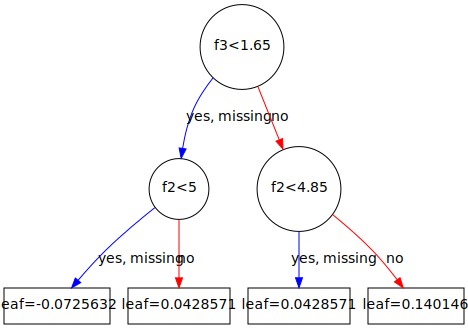

In [6]:
xgb.to_graphviz(bst, num_trees=2)

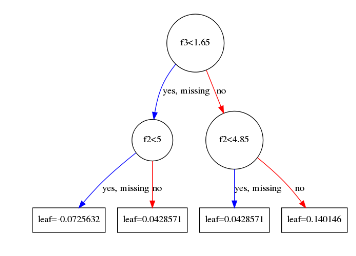

In [7]:
xgb.plot_tree(bst, num_trees=2)

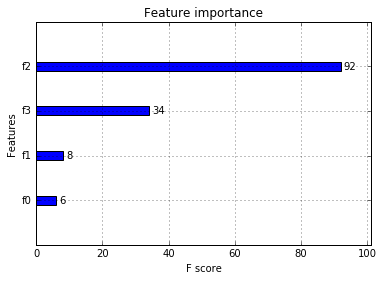

In [8]:
xgb.plot_importance(bst)